# BERTopic: to extract topic from texts

In [8]:
!pip3 install bertopic

Defaulting to user installation because normal site-packages is not writeable
  Using cached bertopic-0.14.1-py2.py3-none-any.whl (120 kB)
  Using cached hdbscan-0.8.29.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Using cached plotly-5.13.1-py2.py3-none-any.whl (15.2 MB)
  Using cached sentence_transformers-2.2.2-py3-none-any.whl
  Using cached Cython-0.29.33-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [2]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)

ModuleNotFoundError: No module named 'bertopic'

In [1]:
# from: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing
# Problem: crashes when try to run pip install bertopic on terminal - because of torch?

# Tweepy: API for Twitter

In [1]:
!pip install tweepy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# from: https://docs.tweepy.org/en/stable/install.html
# and: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/
# Need to apply for developer access
# Waiting for application to be accepted

In [3]:
import tweepy as tw

# Wikipedia pageviews using mwviews

In [47]:
# inspired from tutorial: https://notebook.community/staeiou/wiki-stat-notebooks/pageviews/pageviews_congress

In [48]:
import mwviews
from mwviews.api import PageviewsClient
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
p = PageviewsClient(user_agent="Python query script by me")

In [50]:
subject_views = p.article_views(project='en.wikipedia', 
                            articles=['ChatGPT', 'GPT-3'], 
                            granularity='monthly', 
                            start='2020040100', 
                            end='2023030100')

In [51]:
subject_df = pd.DataFrame(subject_views)
subject_df = subject_df.transpose()
subject_df = subject_df.set_index(subject_df.index.strftime("%Y-%m")).sort_index()
subject_df.iloc[0:5, 0:2]

,ChatGPT,GPT-3
2020-04,None,None
2020-05,NaN,67.0
2020-06,NaN,679.0
2020-07,NaN,5168.0
2020-08,NaN,126196.0


In [52]:
subject_sum = subject_df.sum()
subject_sum[0:5]

ChatGPT     15552537
GPT-3      3489074.0
dtype: object

In [53]:
subject_monthly_sum = subject_df.transpose().sum()
subject_monthly_sum.head()

2020-04           0
2020-05        67.0
2020-06       679.0
2020-07      5168.0
2020-08    126196.0
dtype: object

Text(0, 0.5, 'Month')

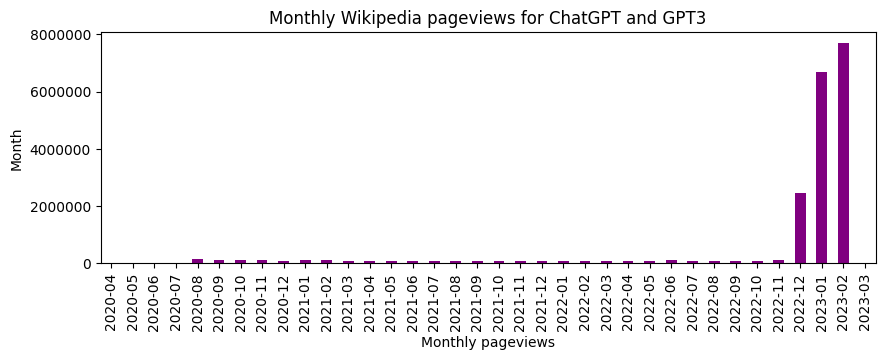

In [54]:
fig = plt.figure(figsize=(10,3))
plt.title("Monthly Wikipedia pageviews for ChatGPT and GPT3")
plt.ticklabel_format(style = 'plain')

ax = subject_monthly_sum.plot(kind='bar', color="purple")

ax.set_xlabel("Monthly pageviews")
ax.set_ylabel("Month")